In [111]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [112]:
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

# **RAVDESS DATA PREP**

In [113]:
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_02',
 'Actor_17',
 'Actor_05',
 'Actor_16',
 'Actor_21',
 'Actor_01',
 'Actor_11',
 'Actor_20',
 'Actor_08',
 'Actor_15',
 'Actor_06',
 'Actor_12',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_04',
 'Actor_19',
 'Actor_10',
 'Actor_09',
 'Actor_14',
 'Actor_03',
 'Actor_13',
 'Actor_18',
 'Actor_07']

In [114]:
for i in ravdess_directory_list:
    actor= os.listdir(Ravdess+i)
    for j in actor[:1]:
        print(j)
        


03-01-08-01-01-01-02.wav
03-01-02-01-02-02-17.wav
03-01-08-01-02-02-05.wav
03-01-03-02-02-01-16.wav
03-01-02-01-01-01-21.wav
03-01-02-01-02-02-01.wav
03-01-06-02-02-01-11.wav
03-01-05-01-02-01-20.wav
03-01-02-02-01-02-08.wav
03-01-05-02-02-02-15.wav
03-01-02-01-01-02-06.wav
03-01-03-01-01-01-12.wav
03-01-04-02-02-02-23.wav
03-01-04-02-02-02-24.wav
03-01-06-02-02-01-22.wav
03-01-06-01-01-01-04.wav
03-01-06-02-01-02-19.wav
03-01-08-01-02-02-10.wav
03-01-04-01-02-01-09.wav
03-01-02-02-01-02-14.wav
03-01-05-01-01-02-03.wav
03-01-03-01-02-02-13.wav
03-01-03-01-01-01-18.wav
03-01-06-02-01-01-07.wav


In [115]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    actor = os.listdir(Ravdess + i)
    for j in actor:
        wavless = j.split('.')[0]
        target = wavless.split('-')
        file_emotion.append(int(target[2]))
        file_path.append(Ravdess + i + '/' + j)


In [116]:
df = pd.DataFrame(file_emotion, columns=['Emotions'])
df

,Emotions
0,8
1,1
2,7
3,7
4,1
...,...
1435,6
1436,5
1437,4
1438,7


In [117]:
path_df = pd.DataFrame(file_path, columns=['Path'])
path_df

,Path
0,/kaggle/input/ravdess-emotional-speech-audio/a...
1,/kaggle/input/ravdess-emotional-speech-audio/a...
2,/kaggle/input/ravdess-emotional-speech-audio/a...
3,/kaggle/input/ravdess-emotional-speech-audio/a...
4,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...
1435,/kaggle/input/ravdess-emotional-speech-audio/a...
1436,/kaggle/input/ravdess-emotional-speech-audio/a...
1437,/kaggle/input/ravdess-emotional-speech-audio/a...
1438,/kaggle/input/ravdess-emotional-speech-audio/a...


In [118]:
Ravdess_df = pd.concat([df, path_df], axis=1)
Ravdess_df

,Emotions,Path
0,8,/kaggle/input/ravdess-emotional-speech-audio/a...
1,1,/kaggle/input/ravdess-emotional-speech-audio/a...
2,7,/kaggle/input/ravdess-emotional-speech-audio/a...
3,7,/kaggle/input/ravdess-emotional-speech-audio/a...
4,1,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
1435,6,/kaggle/input/ravdess-emotional-speech-audio/a...
1436,5,/kaggle/input/ravdess-emotional-speech-audio/a...
1437,4,/kaggle/input/ravdess-emotional-speech-audio/a...
1438,7,/kaggle/input/ravdess-emotional-speech-audio/a...


In [119]:
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)

In [120]:
Ravdess_df

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
...,...,...
1435,fear,/kaggle/input/ravdess-emotional-speech-audio/a...
1436,angry,/kaggle/input/ravdess-emotional-speech-audio/a...
1437,sad,/kaggle/input/ravdess-emotional-speech-audio/a...
1438,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...


# **CREMAD DATA PREP**

In [121]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [122]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [123]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


In [124]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


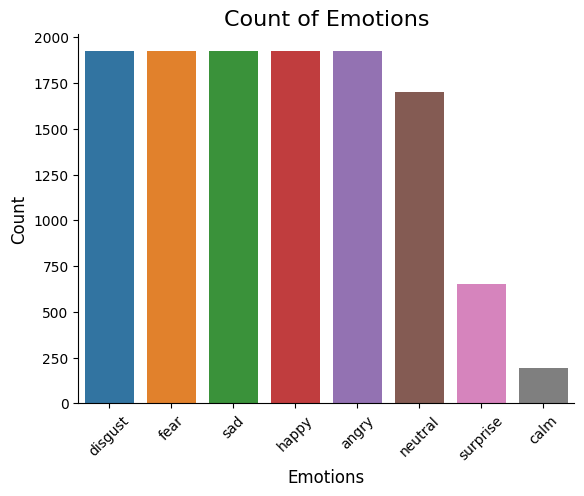

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45) 
plt.show()


In [126]:
import librosa
from IPython.display import Audio

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()




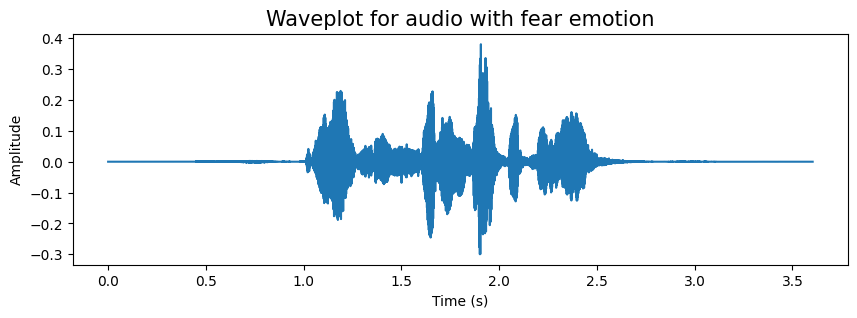

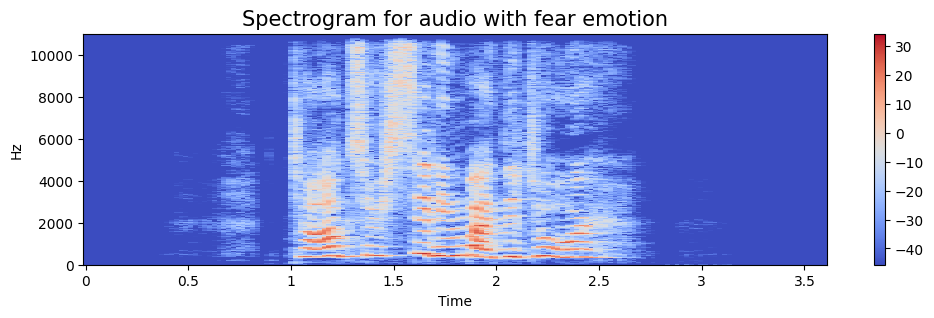

In [127]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(path)

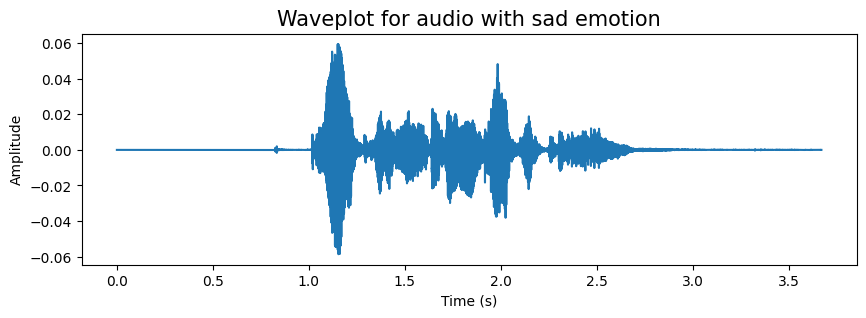

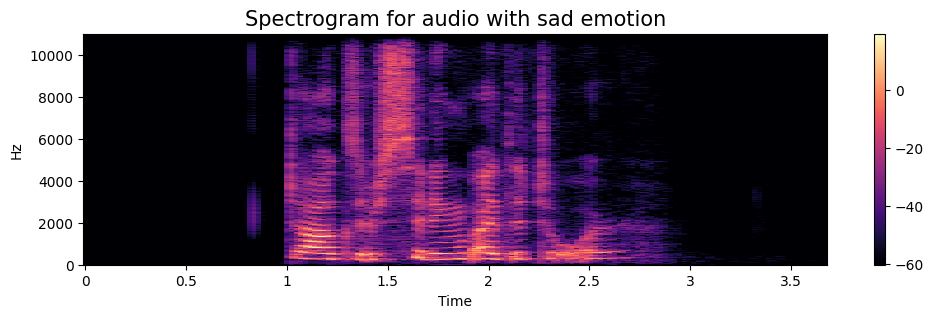

In [128]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

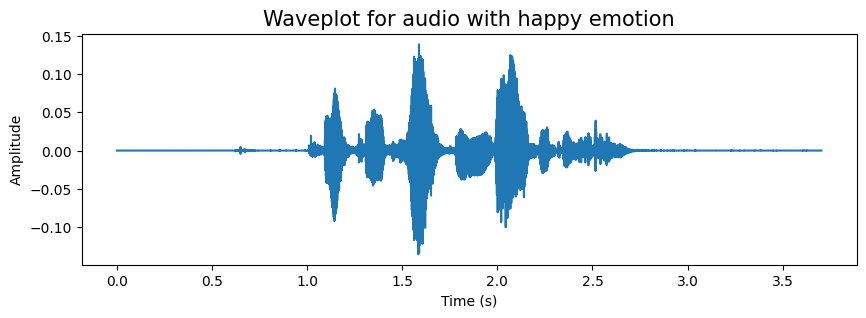

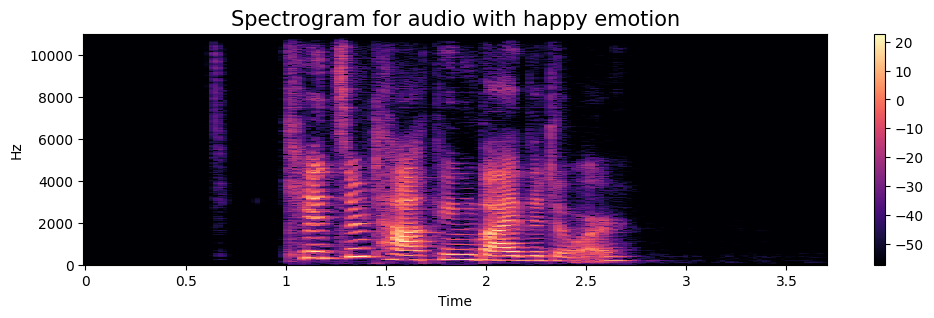

In [129]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [149]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

<Figure size 1400x400 with 0 Axes>

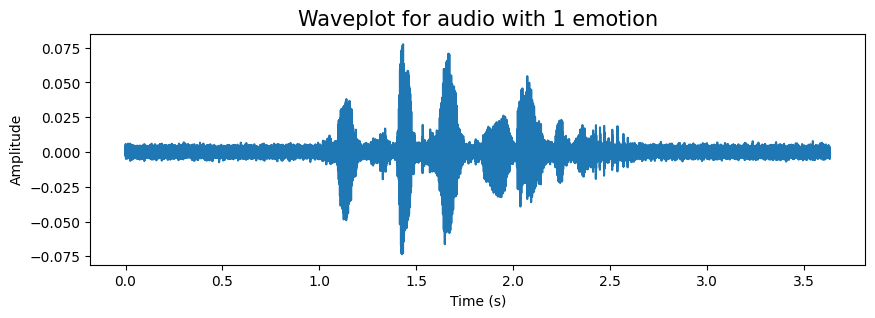

In [150]:
plt.figure(figsize=(14,4))
create_waveplot(noise(data), sample_rate,  1)
Audio(path)

In [151]:
!pip install librosa


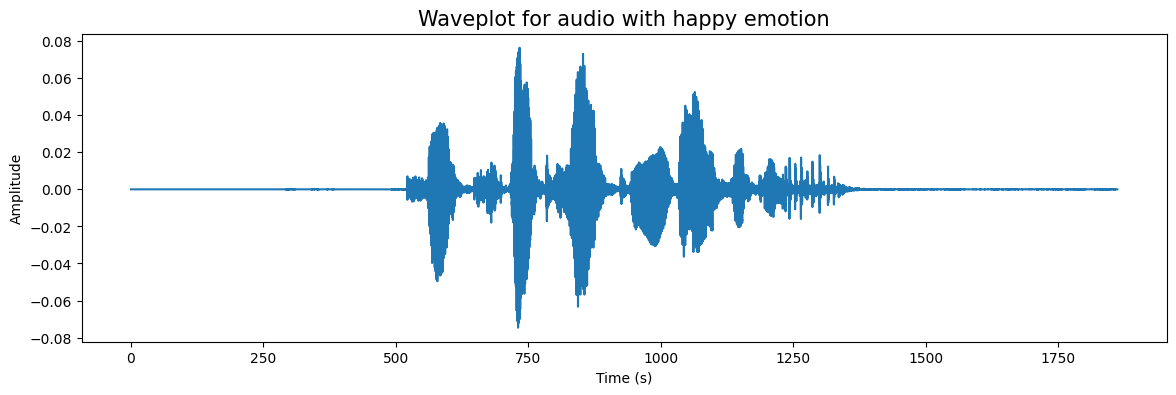

In [131]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load the audio data and sampling rate
data, sample_rate = librosa.load(path)

# Create a time array to plot against
time = librosa.times_like(data)

# Plot the waveplot
plt.figure(figsize=(14, 4))
plt.plot(time, data)
plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(data, rate=sample_rate)


In [132]:
def extract_features(data):
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [133]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

TypeError: time_stretch() takes 1 positional argument but 2 were given